## Héctor E. Delgado Díaz  
## ASTR 511 Winter 2021  
## Homework 3  

##### Note: I couldn't have done this work without the help of: Sam, David Gabby, Jessica & Ed. Also, many thanks to Zeljko's jupyter notebook for some insights on the problem. But most importantly, thank you to the most awesome and amazing professors of UW and arguably the world: Mario Juric and Zeljko Ivezic. 

## Problem A  

Deﬁne a “gold parallax sample” by requiring a signal-to-noise ratio of at least 10 for the trigonometric parallax measurement (i.e., piObs/piErr > 10). Compute the distance and distance modulus from the parallax measurement (D/kpc=1 milliarcsec/piObs) and compare it to the distance modulus determined from r and M r listed in the “truth” ﬁle. Plot the distribution of the distance modulus diﬀerence and compute its median and root-mean-square scatter (hint: beware of outliers and clip at 3σ!). Are they “interestingly” small? Is the distribution deviating from a gaussian? Would you expect it to? Why? How many white dwarfs would you expect in a “gold parallax sample” from the full LSST survey area of 20,000 deg 2 (hint: simply scale by the area because the distance cutoﬀ is smaller than the thin disk scaleheight)? Plot the (g −r) vs. (u−g) color-color diagram (using observed photometry) for this sample. Does it look crisper than the SDSS distribution shown in the bottom left corner of ﬁg. 23 in Ivezi´c et al. (2007, AJ, 134, 973)? Hint: look at the two bottom panels in ﬁg. 24.

In [1]:
# Import standard libraries as usual

import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.integrate import quad
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data to variables. WDtrue contains input information while WDObs contains the observed properties

WDtrue = pd.read_csv('/Users/hector/Desktop/ASTR511/ASTR511-hw-wi21/hw3/LSSTsimWDtruth60.dat', delim_whitespace=True)
WDObs = pd.read_csv('/Users/hector/Desktop/ASTR511/ASTR511-hw-wi21/hw3/LSSTsimWDObs60.dat', delim_whitespace=True)

In [3]:
# Get the trigonometic parallax measurement and its error

piObs = WDObs['piObs']
piErr = WDObs['piErr']

In [4]:
# Divide the measurement by its error to calculate the snr of each measurement that are greater than 10

snr = np.abs(np.divide(piObs, piErr)) > 10

# From the file, get the measurements with snr > 10

obs_gold = WDObs[snr]
true_gold = WDtrue[snr]

To calculate the distance from the observed properties:

$$\frac{D}{kpc} = \frac{1 mas}{piObs} $$

Where $piObs$ is in mas.

As for the distance modulus:

$$ \delta DM = 5 \log{\frac{D}{10}}$$

The distance modulus for the true data is given by:

$$\delta DM = r - M_r$$

Where $r$ is the apparent magnitude and $M_r$ is the absolute magnitude

In [5]:
# Calculate the distance modulus from the observed data and for the input info

obs_gold['D(kpc)'] = 1 / obs_gold['piObs']
obs_gold['DM'] = 5 * np.log10(obs_gold['D(kpc)'] * 1000) - 5

In [6]:
true_gold['DM'] = true_gold['r'] - true_gold['Mr']

Text(0, 0.5, 'True DM')

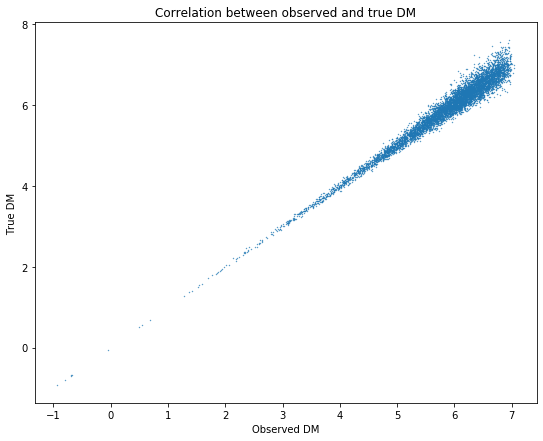

In [7]:
# Plot obs D vs truth DM for gold sample

plt.figure(figsize=[9,7])
plt.scatter(obs_gold['DM'], true_gold['DM'], marker='.', s=.5)
plt.title("Correlation between observed and true DM")
plt.xlabel('Observed DM')
plt.ylabel('True DM')

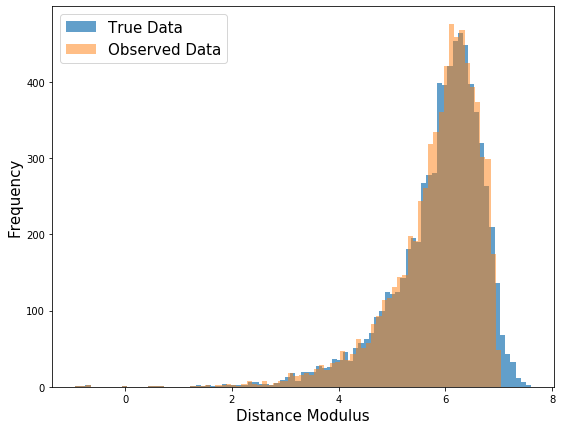

In [8]:
# Plot the histogram of the observed and true data to compare

plt.figure(figsize=[9,7])
plt.hist(x=true_gold['DM'], bins='auto', label='True Data', alpha=0.7)
plt.hist(x=obs_gold['DM'], bins='auto', label='Observed Data', alpha=0.5)
plt.xlabel('Distance Modulus', fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend(fontsize=15)
plt.show()

Comparing the histograms there is a clear overlap between the true and observed data, however the observed data cuts off before the true data does. Since further white dwarfs are fainter due to their distance, LSST might not have detected them or the snr was lower than 10, thus explaining the missing right flank.

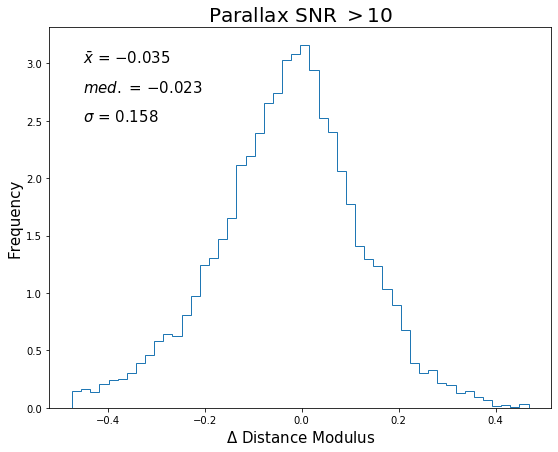

In [9]:
# To plot the DM difference between observed and true data, first calculate it
# Calculate the difference in distance modulus for observed and true data

diff = obs_gold['DM'] - true_gold['DM']

# To get rid of outliers, calculate the standard deviation at +/-3 sigmas. Everything that's greater than 3sigma is
# cut off

sig = 3 * np.std(diff) 

# Clip the outlers at +/- 3 sigma
clip = (diff > -sig) & (diff < sig)
diff_clip = diff[clip]
     
# Plot the distribution

plt.figure(figsize=[9,7])
plt.hist(x=diff_clip, bins='auto', density=True, histtype='step')
plt.xlabel('$\Delta$ Distance Modulus', fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Parallax SNR $>10$", fontsize=20)
plt.text(-0.45,3.00,("$\\bar{{x}}$ = ${:.3f}$".format(np.mean(diff))), fontsize=15)
plt.text(-0.45,2.75,("$med.$ = ${:.3f}$".format(np.median(diff))), fontsize=15)
plt.text(-0.45,2.50,("$\sigma$ = ${:.3f}$".format(np.std(diff))), fontsize=15)
plt.show()

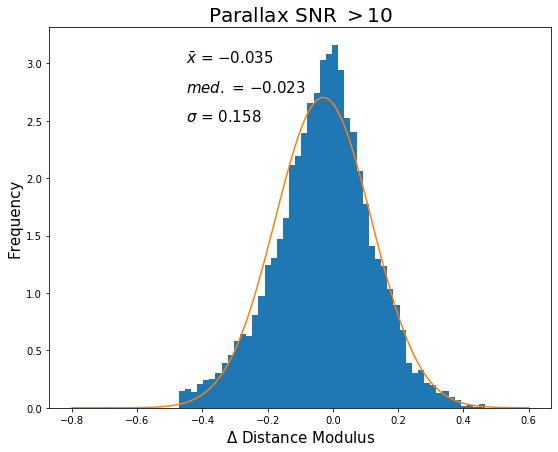

In [10]:
# To verify if the distribution truly follows a gaussian distribution, overplot it with the mu and sigma calculated
# on the previous step
# Import gaussian distribution function from scipy

from scipy.stats import norm

# Define the parameters for a corresponding normal distribution

mu = np.mean(diff_clip)
sigma = np.std(diff_clip)


plt.figure(figsize=[9,7])
plt.hist(diff_clip, bins=50, density=True)
plt.plot(np.linspace(-.8, .6, 100), norm(mu, sigma).pdf(np.linspace(-.8, .6, 100)))
plt.xlabel('$\Delta$ Distance Modulus', fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Parallax SNR $>10$", fontsize=20)
plt.text(-0.45,3.00,("$\\bar{{x}}$ = ${:.3f}$".format(np.mean(diff))), fontsize=15)
plt.text(-0.45,2.75,("$med.$ = ${:.3f}$".format(np.median(diff))), fontsize=15)
plt.text(-0.45,2.50,("$\sigma$ = ${:.3f}$".format(np.std(diff))), fontsize=15)
plt.show()

In general, it seems to follow a gaussian distribution, however there are some minor details that are interesting to study:  

First, the distribution is centered slightly left from 0, meaning that the observed DM is smaller than the true DM, in other words the true data overestimates the DM of the WDs. Second, the left tail of the distribution is wider than the expected Gaussian distribution. Nevertheless, the details are so minor that the data should be considered good.

It is, however, expected that the data would deviate from a gaussian because of systemic errors that could affect the data. 

In [11]:
# Now, calculate the number of WDs on the sample.
# First, take the number of stars within SNR cutoff of 10

n_sample = len(obs_gold)

# Calculate the surface area integral using the quad function

sin = lambda x: np.sin(x)
area = 2 * np.pi * quad(sin, (5*np.pi)/6, np.pi)[0] * 3283

# Total survey area of LSST

LSST = 20000 # deg^2

# Calculate number of WDs in sample

N_wd = (LSST / area) * n_sample
print("The approximate number of White Dwarfs in the LSST survey is {}.".format(np.rint(N_wd)))

The approximate number of White Dwarfs in the LSST survey is 51788.0.


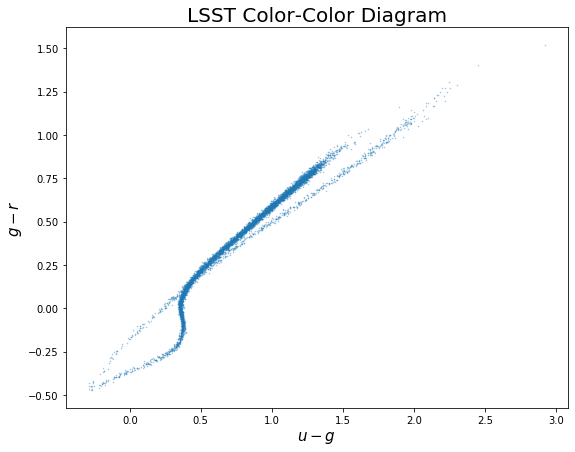

In [12]:
# Last step of part A is to compare the data with Ivezic's 2007 fig 23. 
# Calculate the color magnitude for g - r and u- g for the observed data

g_r = obs_gold['gObs'] - obs_gold['rObs']
u_g = obs_gold['uObs'] - obs_gold['gObs']

# Plot the results to compare 

plt.figure(figsize=[9,7])
plt.scatter(u_g, g_r, s=0.3, alpha=0.4)
plt.ylabel('$g - r$', fontsize=15)
plt.xlabel("$u - g$", fontsize=15)
plt.title("LSST Color-Color Diagram", fontsize=20)
plt.show()

When comparing this plot to Ivezic et al. 2007 fig 23 and the bottom row of fig 24, LSST data will definitely look crisper than SDSS data. This is because LSST will have better resolution, it will be able to detect fainter (r~27) stars and will also detect 10 times more stars than SDSS.

## Problem B  

Using the “gold parallax sample” from A, estimate the absolute r band magnitude as Mobs = rObs − DMobs, with the observed distance modulus, DMobs, determined using the “measured” trigonometric parallax, piObs. Plot Mobs vs. (gObs−rObs) color for stars with T=1 (i.e., hydrogen white WDs; while this is a shortcut based on model input, it is possible to photometrically distinguish hydrogen from helium WDs by considering their four-dimensional color loci; however, this is beyond the scope of this project and hence this shortcut). Fit a low-order polynomial to derive a photometric parallax relation, M r (g−r) (hint: you may want to ﬁrst compute the median M r in about 0.1 mag wide bins of the g − r color, and then ﬁt a polynomial to these median values vs. g − r bin value). How did you choose the order of your polynomial ﬁt? In what range of M r and (g − r) is your relation valid?

In [13]:
# Using the given equation (MObs = rObs - DMObs), calculate the absolute magnitude for the observed data and then 
# slice the data to get only hydrogen type WD (T=1)

obs_gold['MObs'] = obs_gold['rObs'] - obs_gold['DM']

hydrogen_WD = obs_gold[true_gold['T'] == 1]
hydro_gr = hydrogen_WD['gObs'] - hydrogen_WD['rObs']

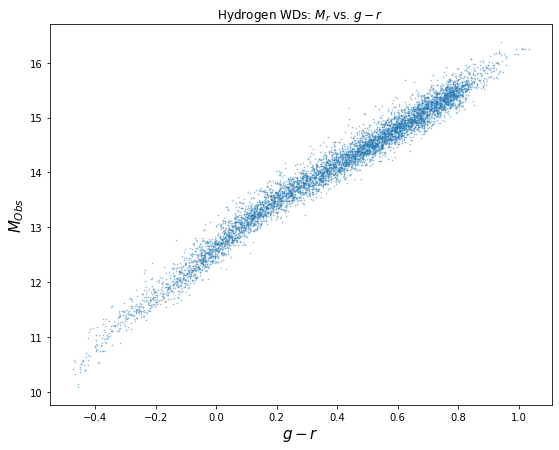

In [14]:
# Plot MObs vs g - r (Obs)

plt.figure(figsize=[9,7])
plt.scatter(hydro_gr, hydrogen_WD['MObs'], s=0.5, alpha=0.4)
plt.ylabel('$M_{Obs}$', fontsize=15)
plt.xlabel("$g - r$", fontsize=15)
plt.title(r'Hydrogen WDs: $M_r$ vs. $g-r$')
plt.show()

In [15]:
# To fit a low-order polynomial, first calculate the number of bins for width = 0.1.
bins = np.arange(hydro_gr.min(), hydro_gr.max(), .1)

# Then store an array for binned medians of MObs.

median, edge, n = scipy.stats.binned_statistic(hydro_gr, hydrogen_WD['MObs'], statistic='median', bins=bins)
x_bins = (edge[1:] + edge[:-1])/2

# To fit the low-order polynomial, start first with a linear fit and go up to 4th order.

fit, residuals, rank, val, rcond = np.polyfit(x_bins, median, 1, full=True)
residuals = np.float(residuals)

def linear(x,fit):
    lin = fit[0] * x + fit[1]
    return lin

# Fit a quadratic  

fit_1, residuals_1, rank, val, rcond = np.polyfit(x_bins, median, 2, full=True)
residuals_1 = np.float(residuals_1)
 
def quadratic(x, fit_1):
    quad = fit_1[0] * x ** 2 + fit_1[1] * x + fit_1[2]
    return quad
      
# Fit a cubic  

fit_2, residuals_2, rank, val, rcond = np.polyfit(x_bins, median, 3, full=True)
residuals_2 = np.float(residuals_2)

def cubic(x, fit_2):
    cube = fit_2[0] * x ** 3 + fit_2[1] * x ** 2 + fit_2[2] * x + fit_2[3]
    return cube

# Fit a quartic

fit_3, residuals_3, rank,val, rcond = np.polyfit(x_bins, median, 4, full=True)
residuals_3 = np.float(residuals_3)
 
def quartic(x, fit_3):
    quart = fit_3[0] * x ** 4 + fit_3[1] * x ** 3 + fit_3[2] * x ** 2 + fit_3[3] * x + fit_3[4]
    return quart

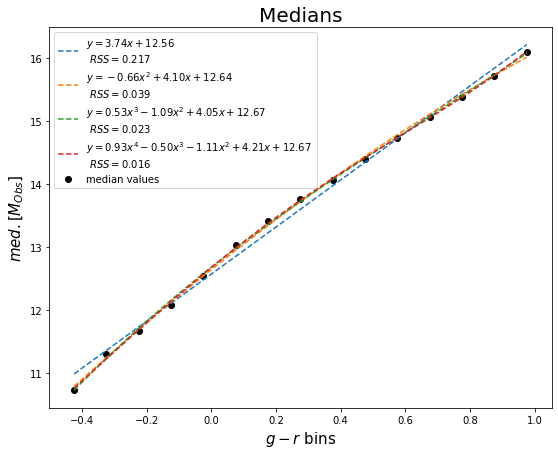

10.722937514441341 16.1017238963461
-0.42399999999999666 0.976000000000003


In [16]:
# Plot the medians with linear, quadratic, and cubic fits for comparison.   

plt.figure(figsize=[9,7])
plt.scatter(x_bins, median, color='k', label = 'median values')
plt.plot(x_bins,linear(x_bins, fit), linestyle='--', label='$y = {:.2f}x + {:.2f}$ \n $RSS = {:.3f}$'.format(fit[0], fit[1], residuals))
plt.plot(x_bins,quadratic(x_bins, fit_1), linestyle='--', label='$y = {:.2f}x^2 + {:.2f}x + {:.2f}$ \n $RSS = {:.3f}$'.format(fit_1[0], fit_1[1], fit_1[2], residuals_1))
plt.plot(x_bins,cubic(x_bins, fit_2), linestyle='--', label='$y = {:.2f}x^3 {:.2f}x^2 + {:.2f}x + {:.2f}$ \n $RSS = {:.3f}$'.format(fit_2[0], fit_2[1], fit_2[2], fit_2[3], residuals_2))
plt.plot(x_bins,quartic(x_bins, fit_3), linestyle='--', label='$y = {:.2f}x^4 {:.2f}x^3 {:.2f}x^2 + {:.2f}x + {:.2f}$ \n $RSS = {:.3f}$'.format(fit_3[0], fit_3[1], fit_3[2], fit_3[3], fit_3[4], residuals_3))
plt.ylabel('$med.[M_{Obs}]$', fontsize=15)
plt.xlabel("$g - r$ bins", fontsize=15)
plt.title("Medians", fontsize=20)
plt.legend(fontsize=10)
plt.show()

print(np.min(median),np.max(median))
print(np.min(x_bins),np.max(x_bins))

I'm convinced that a fourth-order polynomial is still consider a low-order function, hence a quartic fit would fit best the median values when comparing the residuals (RSS) for each fit.  

Looking at the min and max for $M_r$ and $g - r$, the polynomial fit is valid for:

$$M_r = [10.72, 16.10]$$
$$g - r = [-0.42, 0.98]$$

## Problem C  

C) Deﬁne a “gold proper motion sample” by requiring rObs < 24.5. What fraction of this sample has the observed proper motion measured with a signal-to-noise ratio (to compute SNR: add the two proper motion components in quadrature and divide by the listed proper motion error) of at least 3? Apply your photometric parallax relation from B to estimate Mr  and distance (using Mr and rObs). Use this distance to compute tangential velocity, v tan (of course, you also need the observed proper motion; be careful about units!). Deﬁne a candidate disk sample as stars with v tan < v tan cutoff , and a candidate halo sample as stars with v tan > v tan cutoff . Using P from the truth ﬁle, plot the completeness and contamination for disk and halo samples as a function of v tan cutoff for 0 < v tan cutoff < 500 km/s (in steps of, say, 20 km/s). The completeness is deﬁned as the number of (disk, halo) objects in the selected subsample divided by the total number of such objects, and contamination is the number of objects of the “wrong” type in the selected subsample divided by the total number in that subsample.

In [17]:
# Slice the data by requiring rObs < 24.5

obs_gold = WDObs[WDObs['rObs'] < 24.5]

To calculate the snr of the observed proper motion:

$$ SNR = \frac{\sqrt{\mu_{RA}^2 + \mu_{Dec}^2}}{\mu_{err}}$$ 

Where $\mu$ are the vector components of the proper motion in R.A. and Dec. coordinates with their error.

In [18]:
# Calculate the SNR of at least 3 for the proper motion

snr_3 = (np.sqrt(WDObs['muRAObs'] ** 2 + WDObs['muDecObs'] ** 2) / WDObs['muErr']) >= 3
obs_proper = obs_gold[snr_3]

print(len(obs_gold))
print(len(obs_proper))

182757
178244


Of the 182757 stars from the gold parallax sample, 178244 or 97.5% of the data have an SNR of 3 or more

In [19]:
# Using the 4th order polynomial, calculate the absolute magnitude and distamce of the observed data

estimated_Mr = quartic(obs_proper['gObs']-obs_proper['rObs'], fit_3)
dist = 10 ** ((obs_proper['rObs'] - estimated_Mr)/ 5 + 1) # in pc

To calculate the tangential velocity:

$$v_{tan} = \sqrt{\mu_{RA}^2 + \mu_{Dec}^2}$$

In [20]:
# Calculate v_tan and remember to use a converstion factor so that units agree (const)

const = np.pi * 978462 / (180 * 1000 * 3600)
v_tan = const * dist * np.sqrt(obs_proper['muRAObs'] ** 2 + obs_proper['muDecObs'] ** 2)

In [21]:
# To define a candidate disk/halo sample, first define a range of v_tan cutoffs to try

v_tan_cut = np.arange(20, 500, 20)

# Slice the "true" data so it matches the sliced observed data, and take the P column that has the info
# of the galactic population where 1 means disk and 2 means halo

true_slice = WDtrue.loc[obs_proper.index, 'P']

# Create empty arrays to store the results for each v_tan cuttoff

disk_comp = []
disk_cont = []
halo_comp = []
halo_cont = []

# The v_tan cuttoffs are a way to define the disk/halo subsample. To get completeness:
# 1. Get the number of stars with v_tan < v_tan_cut[i]
# 2. Verify that the star is in fact part of the population (1 if it is for disk, !1 for halo)
# 3. Sum the objects that meet this criteria
# 4. Divide it by the total number of objects that are part of the disk/halo population

# For contamination, step 2 would be to verify the stars are NOT part of the population and step 4 would be to
# divide by the total number of stars within the v_tan cuttoff.

# Repeat for each v_tan_cut

for n in v_tan_cut:
    dcp = (((v_tan < n) == (true_slice == 1)) & ((true_slice == 1) == 1)).sum() / float((true_slice == 1).sum())
    disk_comp.append(dcp)
    
    dct = (((v_tan < n) != (true_slice == 1)) & ((v_tan < n) == 1)).sum() / float((v_tan < n).sum())
    disk_cont.append(dct)
    
    hcp = (((v_tan < n) == (true_slice == 1)) & ((true_slice == 1) == 0)).sum() / float(len(true_slice == 1) - (true_slice == 1).sum())
    halo_comp.append(hcp)
    
    hct = (((v_tan < n) != (true_slice == 1)) & ((v_tan < n) == 0)).sum() / float(len(v_tan < n) - (v_tan < n).sum())
    halo_cont.append(hct)

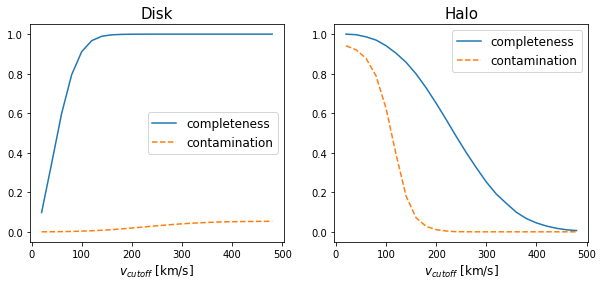

In [22]:
# Plot the completeness and contamination for each population


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,4)

ax1.plot(v_tan_cut, disk_comp, linestyle='-', label='completeness')
ax1.plot(v_tan_cut, disk_cont, linestyle='--', label='contamination')
ax2.plot(v_tan_cut, halo_comp, linestyle='-', label='completeness')
ax2.plot(v_tan_cut, halo_cont, linestyle='--', label='contamination')

ax1.set_title('Disk', fontsize=15)
ax2.set_title('Halo', fontsize=15)

ax1.set_xlabel('$v_{cutoff}$ [km/s]', fontsize=12)
ax2.set_xlabel('$v_{cutoff}$ [km/s]', fontsize=12)

ax1.legend(fontsize=12)
ax2.legend(fontsize=12)

plt.show()

It seems that the defined candidate disk/halo samples from Problem D agree perfectly with the plots. For the disk, completeness at ~150km/s is mostly achieved so that would be the maximum v_tan needed while for the halo cuttoff, at a v_tan of 200km/s or more, the contamination is at its minimum.

## Problem D

Using the “gold proper motion sample” from C, deﬁne a candidate disk sample by v tan < 150 km/s, and a candidate halo sample by v tan > 200 km/s. Using your results from C, estimate the completeness and contamination for each subsample. Using the C method implemented in astroML 2 (of course, you are welcome to write your own code for extra credit and a feeling of extraordinary accomplishment!), compute the diﬀerential luminosity function for each subsample (this is the hardest part of this project!). Explain how did you get the normalization constant. Plot your results in a log(Φ) vs. M r diagram (with error bars!), and overplot the true luminosity function listed in ﬁles WDlumfuncDisk.dat and WDlumfuncHalo.dat (the diﬀerential LF listed in the second column is expressed as the number of stars per pc3  and mag; the LFs are slightly inconsistent with the Harris et al. due to a bug in simulations but, importantly, they do correspond to the “true” LFs for the simulated sample). Comment on (dis)agreement between your Φ and the true Φ (which was used to generate the simulated sample). IMPORTANT - YOU NEED TO FIX A BUG: Divide the halo Φ from ﬁle WDlumfuncHalo.dat by 200 to get a proper normalization in units of stars per pc 3 and mag!

In [23]:
# From the subsample set of problem C, create another one for the disk with v_tan < 150 and -0.4 < g - r < 1
# From problem B

v_disk_max = v_tan < 150
disk_sub = obs_proper[(v_disk_max) & (obs_proper['gObs'] - obs_proper['rObs'] > -0.4) & (obs_proper['gObs'] - obs_proper['rObs'] < 1.0)]

# Do the same for the halo with v_tan > 200 and -0.4 < g - r < 1

v_halo_min = v_tan > 200
halo_sub = obs_proper[(v_halo_min) & (obs_proper['gObs'] - obs_proper['rObs'] > -0.4) & (obs_proper['gObs'] - obs_proper['rObs'] < 1.0)]

# Do the same with the true data, taking into account the snr cuts. Then split between disk and halo

WD_true_snr = WDtrue[(WDObs['rObs'] < 24.5) & (snr_3)]
WD_true_slice = WD_true_snr[(obs_proper['gObs'] - obs_proper['rObs'] > -0.4) & (obs_proper['gObs'] - obs_proper['rObs'] < 1.0)]

true_disk_sub = WD_true_slice[v_disk_max]
true_halo_sub = WD_true_slice[v_halo_min]

In [24]:
# Calculate completeness and contamination the same way as problem C using v = 150 and 200

dcp = (((v_tan < 150) == (true_slice == 1)) & ((true_slice == 1) == 1)).sum() / float((true_slice == 1).sum())

dct = (((v_tan < 150) != (true_slice == 1)) & ((v_tan < 150) == 1)).sum() / float((v_tan < 150).sum())

hcp = (((v_tan < 200) == (true_slice == 1)) & ((true_slice == 1) == 0)).sum() / float(len(true_slice == 1) - (true_slice == 1).sum())

hct = (((v_tan < 200) != (true_slice == 1)) & ((v_tan < 200) == 0)).sum() / float(len(v_tan < 200) - (v_tan < 200).sum())

# Report completeness and contamination
print('Disk completeness = {}'.format(dcp))
print('Disk contamination = {}'.format(dct))
print('Halo completeness = {}'.format(hcp))
print('Halo contamination = {}'.format(hct))

Disk completeness = 0.9941126947613063
Disk contamination = 0.009621745499220338
Halo completeness = 0.649749373433584
Halo contamination = 0.010968049594659036


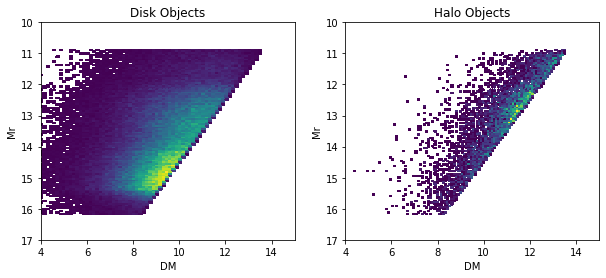

In [25]:
# Plot the density of the disk and halo subsamble

disk_sub['M_r'] = quartic(disk_sub['gObs']-disk_sub['rObs'], fit_3)
disk_sub['DM'] = disk_sub['rObs'] - disk_sub['M_r']

halo_sub['M_r'] = quartic(halo_sub['gObs']-halo_sub['rObs'], fit_3)
halo_sub['DM'] = halo_sub['rObs'] - halo_sub['M_r']

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,4)

ax1.hist2d(disk_sub['DM'], disk_sub['M_r'], bins=100, cmin=1)
ax1.set_xlim([4, 15])
ax1.set_ylim([10, 17])
ax1.invert_yaxis()
ax1.set_xlabel('DM')
ax1.set_ylabel('Mr')
ax1.set_title('Disk Objects')

ax2.hist2d(halo_sub['DM'], halo_sub['M_r'], bins=100, cmin=1)
ax2.set_xlim([4, 15])
ax2.set_ylim([10, 17])
ax2.invert_yaxis()
ax2.set_xlabel('DM')
ax2.set_ylabel('Mr')
ax2.set_title('Halo Objects')
plt.show()

In [26]:
# Author: Jake VanderPlas
# License: BSD
# http://astroML.github.com
from astroML.lumfunc import bootstrap_Cminus

# Define the input distributions for x and y
# x = DM 
# y = M_r 
# x_max = 24.5 - M_r(gObs, rObs)
# y_max = 24.5 - rObs - M_r(gObs, rObs)

r = 24.5 # r_limit

# -------Disk-------
# Calculate xmax, ymax

disk_sub['M_r'] = quartic(disk_sub['gObs']-disk_sub['rObs'], fit_3)
disk_sub['DM'] = disk_sub['rObs'] - disk_sub['M_r']
disk_sub['max_DM'] = r - disk_sub['M_r']
disk_sub['max_Mr'] = r - disk_sub['DM']

# Set variables for Cminus implementation (disk)

xD = disk_sub['DM']
yD = disk_sub['M_r']
xmaxD = disk_sub['max_DM']
ymaxD = disk_sub['max_Mr']

# -------Halo-------
# Calculate xmax, ymax
#new_halo_objects = halo_objects[~halo_objects.index.isin([216660])]

halo_sub['M_r'] = quartic(halo_sub['gObs']-halo_sub['rObs'], fit_3)
halo_sub['DM'] = halo_sub['rObs'] - halo_sub['M_r']
halo_sub['max_DM'] = r - halo_sub['M_r']
halo_sub['max_Mr'] = r - halo_sub['DM']

# Set variables for Cminus implementation (halo)

xH = halo_sub['DM']
yH = halo_sub['M_r']
xmaxH = halo_sub['max_DM']
ymaxH = halo_sub['max_Mr']

# aux arrays

x_fit = np.linspace(0, 15, 42)
y_fit = np.linspace(10, 17, 42)

xD, dxD, yD, dyD = bootstrap_Cminus(xD, yD, xmaxD, ymaxD, x_fit, y_fit, Nbootstraps = 5, normalize = True)
xH, dxH, yH, dyH = bootstrap_Cminus(xH, yH, xmaxH, ymaxH, x_fit, y_fit, Nbootstraps = 5, normalize = True)

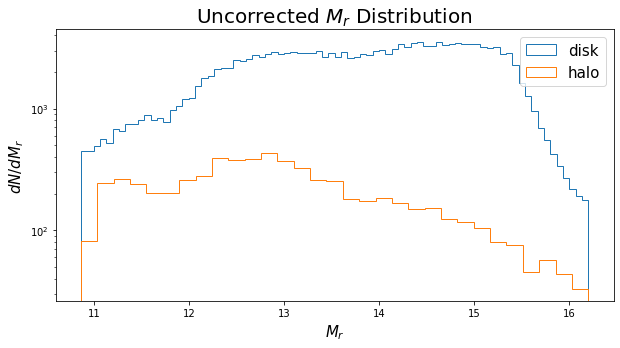

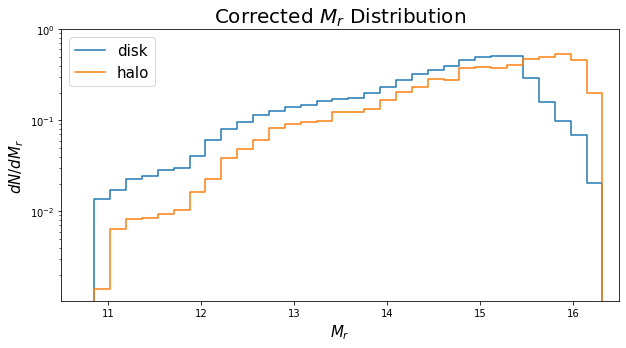

In [27]:
# Plot histograms of corrected/uncorrected M_r distributions

plt.figure(figsize=[10,5])
plt.hist(x=disk_sub['M_r'], bins='auto', label = 'disk', histtype='step')
plt.hist(x=halo_sub['M_r'], bins='auto', label = 'halo', histtype='step')
plt.yscale('log') 
plt.ylabel('$dN/dM_r$', fontsize=15)
plt.xlabel("$M_r$", fontsize=15)
plt.legend(fontsize=15)
plt.title('Uncorrected $M_r$ Distribution', fontsize=20)
plt.show()

plt.figure(figsize=[10,5])
plt.step(x=y_fit[1:], y=yD, label = 'disk')
plt.step(x=y_fit[1:], y=yH, label = 'halo')
plt.yscale('log') 
plt.ylim([-1e4,1])
plt.xlim([10.5,16.5])
plt.ylabel('$dN/dM_r$', fontsize=15)
plt.xlabel("$M_r$", fontsize=15)
plt.legend(fontsize=15)
plt.title('Corrected $M_r$ Distribution', fontsize=20)
plt.show()

It is seen that the uncorrected distribution for the absolute magnitude is dominated by disk objects regardless of their absolute magnitude, however after bootstrapping with Cminus, the corrected distribution shows that the halo sample distribution will dominate at fainter mangnitudes. 

In [28]:
# From the luminosity function data files, load their Mr and Lf to compare with the results from Cminus
# Load in true disk and halo luminosity functions

WD_disk_lum = pd.read_csv('/Users/hector/Desktop/ASTR511/ASTR511-hw-wi21/hw3/WDlumfuncDisk.dat', delim_whitespace=True, comment='#', names=['Mr', 'Lf'])

WD_halo_lum = pd.read_csv('/Users/hector/Desktop/ASTR511/ASTR511-hw-wi21/hw3/WDlumfuncHalo.dat', delim_whitespace=True, comment='#', names=['Mr', 'Lf'])
WD_halo_lum['Lf_corrected'] = WD_halo_lum['Lf'] / 200 # Fix a bug as Zeljko mentioned on the hw

To calculate $\rho$:

$$\rho = \frac{DM}{dV} = \frac{DM}{\tau \times \Omega \times d^2} $$

Where $\tau$ is the thickness of the region, $\Omega$ is the solida angle and $d$ is the distance from the distance modulus

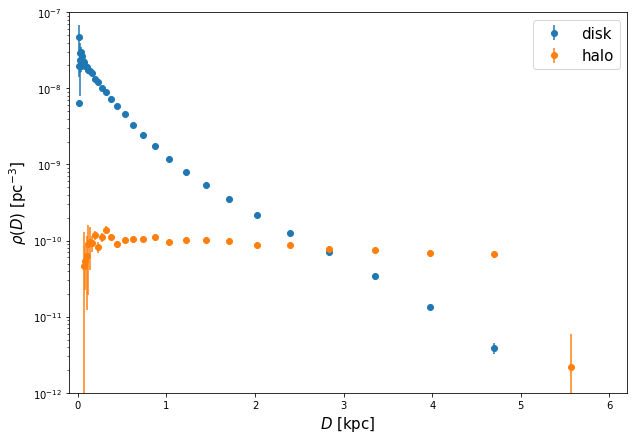

In [29]:
# Convert distances to parsecs

dist_conv = 10 ** ((x_fit / 5) + 1) 

# Calculate solid angle and thickness of the disk

dOmega = 2 * np.pi * quad(sin, (5 * np.pi) / 6, np.pi)[0]
thick = (dist_conv[1:] - dist_conv[:-1]) 

# Reshape distances to match outputs from Cminus by calculating bin centers

bin_cent = (dist_conv[1:] + dist_conv[:-1]) / 2

# Calculate dV 

V = dOmega * bin_cent ** 2 * thick

# Plot rho vs D

plt.figure(figsize=[10,7])
plt.errorbar(bin_cent * 1e-3, (xD / V), yerr = (dxD / V), marker='o', ls='none', label='disk')
plt.errorbar(bin_cent * 1e-3, (xH/V), yerr = (dxH / V), marker='o', ls='none', label='halo')
plt.yscale('log') 
plt.ylim([1e-12,1e-7])
plt.xlim([-0.1,6.200])
plt.ylabel('$\\rho(D)$ [pc$^{-3}$]', fontsize=15)
plt.xlabel("$D$ [kpc]", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [30]:
# To normalize the density based on the number of stars, first normalize the density of the disk and halo
# subsamples followed by normalizing the luminosity function

# To normalize the density
# 1. Find total star counts for disk objects.    
# Create a slice of DM and Mr space by defining DM_max and Mr_max

DM_max = 11.5
Mr_max = r - DM_max
    
# Count how many stars there are within this slice

n_stars_disk = len((disk_sub['DM'] < DM_max) & (disk_sub['M_r'] < Mr_max))

n_stars_halo = len((halo_sub['DM'] < DM_max) & (halo_sub['M_r'] < Mr_max))


# Slice xD and yD for x_fit < DM_max, y_fit < Mr_max respectively

x_fit_slice = (x_fit[1:] + x_fit[:-1]) / 2
y_fit_slice = (y_fit[1:] + y_fit[:-1]) / 2

xD_slice = xD[x_fit_slice <= DM_max]
yD_slice = yD[y_fit_slice <= Mr_max]

# Calculate the area of each bin in the disk distributions from Cminus

DMbin_width = x_fit[1] - x_fit[0] 
Mrbin_width = y_fit[1] - y_fit[0]

DM_disk_area = xD_slice * DMbin_width
Mr_disk_area = yD_slice * Mrbin_width

# Calculate the area under the curve for the new disk subsample for DM and M_r

Sum_area_DM_disk = np.sum(DM_disk_area)
Sum_area_Mr_disk = np.sum(Mr_disk_area)

# Repeat for halo
xH_slice = xH[x_fit_slice <= DM_max]
yH_slice = yH[y_fit_slice <= Mr_max]

DM_halo_area = xH_slice * DMbin_width
Mr_halo_area = yH_slice * Mrbin_width
    
Sum_area_DM_halo = np.sum(DM_halo_area)
Sum_area_Mr_halo = np.sum(Mr_halo_area)

# Calculate constant for the flux-limited number of stars / (%DM * %Mr)

C_disk = n_stars_disk / (Sum_area_DM_disk * Sum_area_Mr_disk)
C_halo = n_stars_halo / (Sum_area_DM_halo * Sum_area_Mr_halo)

In [31]:
# 2. Re-calculate densities using the new constant: C * output from Cminus * DM/dV
# dDM/dV = 5/(ln(10) * D^3 * solid angle)

disk_corrected = xD * C_disk * (5 / (np.log(10) * dist_conv[:-1] ** 3 * dOmega))
disk_err_corrected = dxD * C_disk * (5 / (np.log(10) * dist_conv[:-1] ** 3 * dOmega))

halo_corrected = xH * C_halo * (5 / (np.log(10) * dist_conv[:-1] ** 3 * dOmega))
halo_err_corrected = dxH * C_halo * (5 / (np.log(10) * dist_conv[:-1] ** 3 * dOmega))

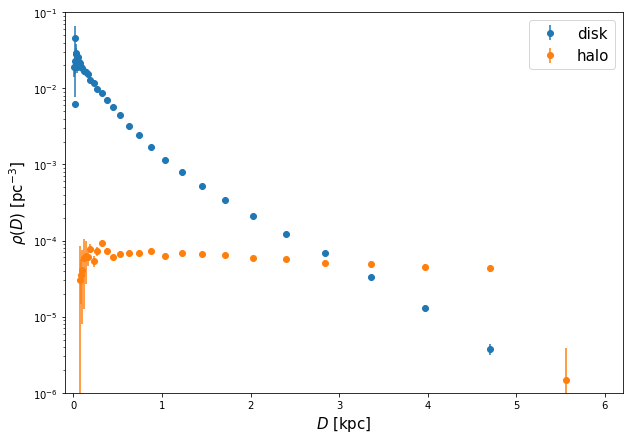

In [32]:
# Plot the re-scaled densities

plt.figure(figsize=[10,7])
plt.errorbar(bin_cent * 1e-3, disk_corrected, yerr = disk_err_corrected, marker='o', ls='none', label='disk')
plt.errorbar(bin_cent * 1e-3, halo_corrected, yerr = halo_err_corrected, marker='o', ls='none', label='halo')
plt.yscale('log') 
plt.ylim([1e-6,0.1])
plt.xlim([-0.1,6.200])
plt.ylabel('$\\rho(D)$ [pc$^{-3}$]', fontsize=15)
plt.xlabel("$D$ [kpc]", fontsize=15)
plt.legend(fontsize=15)
plt.show()

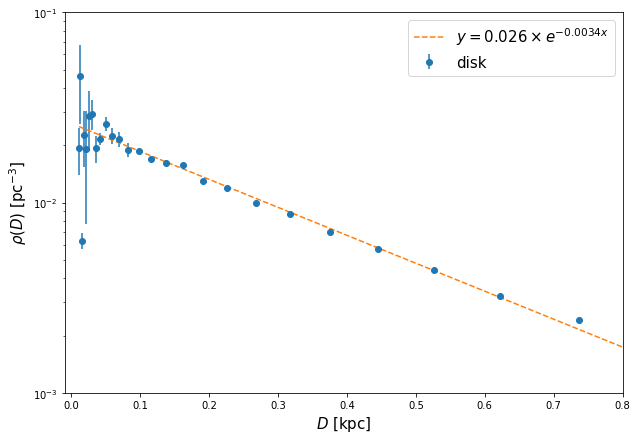

In [33]:
# For the second part to find the normalization constant, normalize the luminosity function. This could be done by
# extrapolating the density at D=0. So an exponential function is needed.

# 1. Define an exponential to fit to the disk
def exp_fit(x, a, b):
    return a * np.exp(-b * x) 

# Fit the exponential to the data using curve_fit

popt, pcov = scipy.optimize.curve_fit(exp_fit, bin_cent, disk_corrected) 

# Plot the points with fit for comparison  

plt.figure(figsize=[10,7])
plt.errorbar(bin_cent * 1e-3, disk_corrected, yerr = disk_err_corrected, marker='o', ls='none', label='disk')
plt.plot(bin_cent * 1e-3, exp_fit(bin_cent, popt[0], popt[1]), linestyle='--', label='$y = {:.3f}\\times e^{{-{:.4f}x}}$'.format(popt[0], popt[1]))
plt.xlabel('$D$ [kpc]', fontsize=15)
plt.ylabel("$\\rho(D)$ [pc$^{-3}$]", fontsize=15)
plt.legend(fontsize=15)
plt.yscale('log') 
plt.ylim([1e-3,0.1])
plt.xlim([-0.01,0.8])
plt.show()

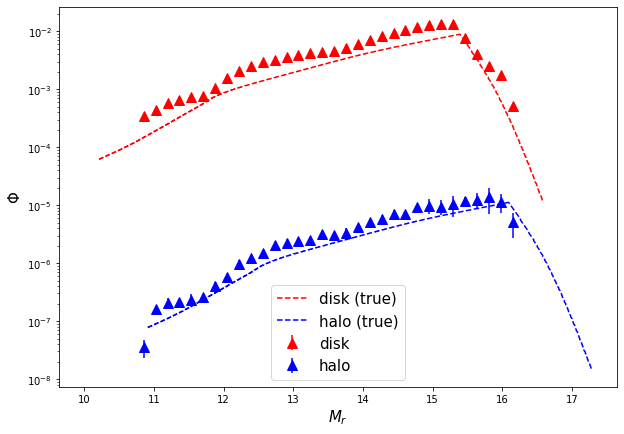

In [34]:
# Calculate rho(D = 0) for the disk subsample by taking the fit function at D=0

rho0_disk = exp_fit(0, popt[0], popt[1]) 

# As for the halo, the data is consistent through D=[2,5]kpc so the median between those points would suffice to get
# rho(D=0)
# Calculate rho(D = 0) for the halo subsample

rho0_halo = np.median(halo_corrected[(bin_cent > 2000) & (bin_cent < 5000)])

# Plot density as a function of x_fit in pc
# Multiply by RhoD0 for disk, halo

plt.figure(figsize=[10,7])
plt.errorbar(WD_disk_lum['Mr'], WD_disk_lum['Lf'] * 4, ls='--', label='disk (true)', color = 'r')
plt.errorbar(WD_halo_lum['Mr'], WD_halo_lum['Lf_corrected'], ls='--', label='halo (true)', color = 'blue')
plt.errorbar(y_fit[:-1], yD * rho0_disk, yerr = dyD * rho0_disk, marker='^', markersize=10, ls='none', label='disk', color = 'r')
plt.errorbar(y_fit[:-1], yH * rho0_halo / 2, yerr = dyH * rho0_halo, marker='^', markersize=10, ls='none', label='halo', color = 'blue')
plt.yscale('log') 
plt.ylabel('$\\Phi$', fontsize=15)
plt.xlabel("$M_r$", fontsize=15)
plt.legend(fontsize=15)
plt.show()

## Problem E

A “byproduct” of the luminosity function determination in D is the spatial distribution of stars. Plot the results for disk and halo subsamples (i.e., ln( ρ ) vs. Z, with error bars!). Compare these proﬁles to the spatial proﬁles you determined as a part of project #1 and comment.

In Homework #1 the spatial profile function obtained was:

$$\rho = 2.4e5 \times R^{-3}$$

At distances over 9kpc it was already diverging.

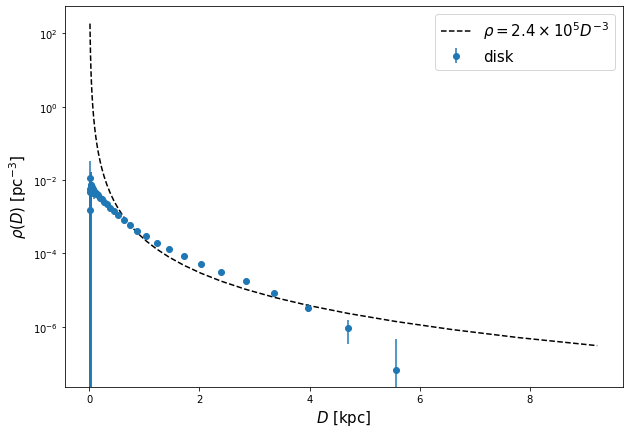

In [35]:
# Plot the spatial profile over the calculated density for the disk 

plt.figure(figsize=[10,7])
plt.errorbar(bin_cent * 1e-3, disk_corrected / 4, yerr = disk_err_corrected, marker='o', ls='none', label='disk')
plt.plot(bin_cent * 1e-3, 2.4e5 * bin_cent ** -3, color='k', linestyle='--', label='$\\rho = 2.4\\times10^5D^{-3}$')
plt.yscale('log') 
plt.ylabel('$\\rho(D)$ [pc$^{-3}$]', fontsize=15)
plt.xlabel("$D$ [kpc]", fontsize=15)
plt.legend(fontsize=15)
plt.show()

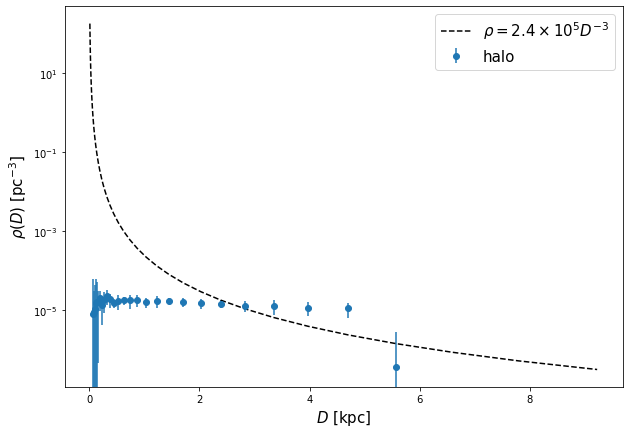

In [36]:
plt.figure(figsize=[10,7])
plt.errorbar(bin_cent * 1e-3, halo_corrected / 4, yerr = halo_err_corrected, marker='o', ls='none', label='halo')
plt.plot(bin_cent * 1e-3, 2.4e5 * bin_cent ** -3, color='k', linestyle='--', label='$\\rho = 2.4\\times10^5D^{-3}$')
plt.yscale('log') 
plt.ylabel('$\\rho(D)$ [pc$^{-3}$]', fontsize=15)
plt.xlabel("$D$ [kpc]", fontsize=15)
plt.legend(fontsize=15)
plt.show()

Based on the plots, the spatial profile does a somewhat good job overlaying near stars of the disk, but at longer distances it doesn't work. In homework #1 the spatial profile was calculated using the metalicity of the stars but it was concluded that this isn't the best method to calculate the profile. As for the halo subsample, it also does a terrible job